In this data, I implemented market basket analysis with apriori and specified the UK data in 2020 so that I can insight into the tendency among one year.

* [<span style='color:#435334'> 1. |</span> Loading and Cleaning data](#section-one)
* [<span style='color:#435334'> 2. |</span> Exploratoty Data Analysis](#section-two)
* [<span style='color:#435334'> 3. |</span> Market Basket Analysis](#section-three)
* [<span style='color:#435334'> 4. |</span> Conclusion](#section-four)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx
/kaggle/input/market-basket-analysis/Assignment-1_Data.csv


<a id="section-one"></a>
## <b><span style='color:#f0bc22'> 1. |</span> Loading and Cleaning data

### <b><span style='color:#f0bc22'> 1-1. |</span> Loading data

In [2]:
df=pd.read_csv('/kaggle/input/market-basket-analysis/Assignment-1_Data.csv',delimiter=';')
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [4]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

### <b><span style='color:#f0bc22'> 1-2. |</span> Dropping data with **`negative`** or **`zero quantity`**

In [5]:
df.loc[df['Quantity']<=0][:5]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
2359,536589,NaN,-10,01.12.2010 16:50,0,NaN,United Kingdom
4289,536764,NaN,-38,02.12.2010 14:42,0,NaN,United Kingdom
6998,536996,NaN,-20,03.12.2010 15:30,0,NaN,United Kingdom
6999,536997,NaN,-20,03.12.2010 15:30,0,NaN,United Kingdom
7000,536998,NaN,-6,03.12.2010 15:30,0,NaN,United Kingdom


In [6]:
df=df.loc[df['Quantity']>0]

### <b><span style='color:#f0bc22'> 1-3. |</span> Dropping data with **`zero price`**

In [7]:
df.loc[df['Price']<='0'][:5
                        ]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
613,536414,NaN,56,01.12.2010 11:52,0,NaN,United Kingdom
1937,536545,NaN,1,01.12.2010 14:32,0,NaN,United Kingdom
1938,536546,NaN,1,01.12.2010 14:33,0,NaN,United Kingdom
1939,536547,NaN,1,01.12.2010 14:33,0,NaN,United Kingdom
1940,536549,NaN,1,01.12.2010 14:34,0,NaN,United Kingdom


In [8]:
df=df.loc[df['Price']>'0']

### <b><span style='color:#f0bc22'> 1-4. |</span> Dropping **`Non-product`** data.

In [9]:
df.loc[(df['Itemname']=='POSTAGE')|(df['Itemname']=='DOTCOM POSTAGE')|(df['Itemname']=='Adjust bad debt')|(df['Itemname']=='Manual')].head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
45,536370,POSTAGE,3,01.12.2010 08:45,18,12583.0,France
377,536403,POSTAGE,1,01.12.2010 11:27,15,12791.0,Netherlands
1113,536527,POSTAGE,1,01.12.2010 13:04,18,12662.0,Germany
1781,536544,DOTCOM POSTAGE,1,01.12.2010 14:32,"569,77",NaN,United Kingdom
2192,536569,Manual,1,01.12.2010 15:35,"1,25",16274.0,United Kingdom


In [10]:
df=df.loc[(df['Itemname']!='POSTAGE')&(df['Itemname']!='DOTCOM POSTAGE')&(df['Itemname']!='Adjust bad debt')&(df['Itemname']!='Manual')]

### <b><span style='color:#f0bc22'> 1-5. |</span> Filling **`null`** data

In [11]:
df.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    130813
Country            0
dtype: int64

In [12]:
df=df.fillna('-')
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

### <b><span style='color:#f0bc22'> 1-6. |</span> Splitting data into **`year`** and **`month`**

In [13]:
df['Year']=df['Date'].apply(lambda x:x.split('.')[2])
df['Year']=df['Year'].apply(lambda x:x.split(' ')[0])
df['Month']=df['Date'].apply(lambda x:x.split('.')[1])
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom,2010,12
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom,2010,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12


### <b><span style='color:#f0bc22'> 1-7. |</span> Creating a **`Total price`** column

In [14]:
df['Price']=df['Price'].str.replace(',','.').astype('float64')
df['Total price']=df.Quantity*df.Price
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Total price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34


### <b><span style='color:#f0bc22'> 1-8. |</span> Checking the **`Total price`** in each month.

In [15]:
df.groupby(['Year','Month'])['Total price'].sum()

Year  Month
2010  12        778386.780
2011  01        648311.120
      02        490058.230
      03        659979.660
      04        507366.971
      05        721789.800
      06        710158.020
      07        642528.481
      08        701411.420
      09        981408.102
      10       1072317.070
      11       1421055.630
      12        606953.650
Name: Total price, dtype: float64

It is appropriate to look at 12-month increments to implement data analytics properly, so I'll drop the data for 2020 Dec.

In [16]:
df=df.loc[df['Year']!='2010']

<a id="section-two"></a>
## <b><span style='color:#f0bc22'> 2. |</span> Exploratoty Data Analysis

### <b><span style='color:#f0bc22'> 2-1. |</span> Sales amount and quantity

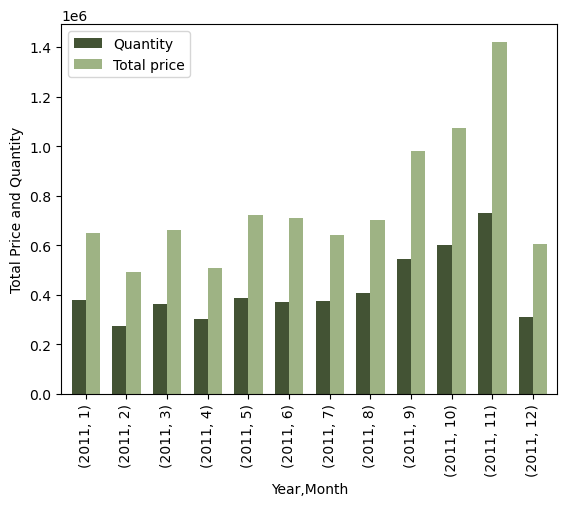

In [49]:
# Grouping and aggregating the data
sales = df.groupby(['Year', 'Month'])[['Total price', 'Quantity']].sum()
sales.to_csv('sales.csv')

# Reading the data from CSV
sales = pd.read_csv('sales.csv')

# Pivot table creation
sales = sales.pivot_table(index=['Year', 'Month'], aggfunc=np.sum, fill_value=0)

# Define custom colors
custom_colors = ['#435334', '#9EB384']
cmap = ListedColormap(custom_colors)

# Plotting the data with custom colors
ax = sales.plot(kind='bar', color=custom_colors, width=0.7)
ax.set_ylabel('Total Price and Quantity')  # Set the y-axis label
plt.show()

In [54]:
# Grouping and aggregating the data
sales_country = df.groupby(['Year', 'Month', 'Country'])['Total price'].sum().reset_index()
sales_country.to_csv('sales_country.csv', index=False)

# Reading the data from CSV
sales_country = pd.read_csv('sales_country.csv')

# Define custom colors (16 colors)
custom_colors = [
    '#435334', '#9EB384', '#D4E157', '#FF7043', '#26A69A', '#AB47BC', 
    '#42A5F5', '#7E57C2', '#FFCA28', '#66BB6A', '#EF5350', '#8D6E63',
    '#EC407A', '#FFA726', '#29B6F6', '#66BB6A'
]

# Plotting the data with custom colors
fig = px.bar(
    sales_country,
    x='Month',
    y='Total price',
    color='Country',
    title='Monthly sales amount in each country in 2021',
    color_discrete_sequence=custom_colors,
)

fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Sales amount'
)
fig.show()

Most of the sales amounts are occupied by the UK.

In [58]:
# Grouping and aggregating the data
country = df.groupby('Country')['Total price'].sum().reset_index()
country.to_csv('country.csv', index=False)

# Reading the data from CSV
country = pd.read_csv('country.csv')

# Define custom colors (16 colors)
custom_colors = ['#9EB384']

# Plotting the data with custom colors
fig = px.bar(
    country,
    x='Country',
    y='Total price',
    title='Sales amount in each country in 2021',
    color='Country',
    color_discrete_sequence=custom_colors
)

fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    yaxis_title='Sales amount'
)
fig.show()

### <b><span style='color:#f0bc22'> 2-2. |</span> Category

> ### Top 10 highest sales amount items

In [20]:
cm=sns.light_palette("green",as_cmap=True)

item_sales=df.groupby('Itemname')['Price'].sum().sort_values(ascending=False)[:10]
item_sales.to_csv('item_sales.csv')
item_sales=pd.read_csv('item_sales.csv')
item_sales.style.background_gradient(cmap=cm).set_precision(2)

,Itemname,Price
0,REGENCY CAKESTAND 3 TIER,24653.67
1,PARTY BUNTING,9416.13
2,SET OF 3 CAKE TINS PANTRY DESIGN,7621.05
3,CREAM SWEETHEART MINI CHEST,6836.38
4,SET/4 WHITE RETRO STORAGE CUBES,6714.75
5,ENAMEL BREAD BIN CREAM,6585.93
6,WHITE HANGING HEART T-LIGHT HOLDER,6563.80
7,DOORMAT KEEP CALM AND COME IN,6385.09
8,SPOTTY BUNTING,6262.40
9,RED RETROSPOT CAKE STAND,6035.29


> ### Top 10 most purchased items

In [21]:
df[['Itemname','Quantity']].sort_values(by='Quantity',ascending=False)[:10].style.background_gradient(cmap=cm).set_precision(2)

,Itemname,Quantity
520583,"PAPER CRAFT , LITTLE BIRDIE",80995
59999,MEDIUM CERAMIC TOP STORAGE JAR,74215
405138,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800
198929,SMALL POPCORN HOLDER,4300
94245,EMPIRE DESIGN ROSETTE,3906
260928,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186
51228,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114
154834,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114
416997,SMALL CHINESE STYLE SCISSOR,3000
280572,ASSORTED COLOUR BIRD ORNAMENT,2880


> ### Top 10 most frequently purchased items 

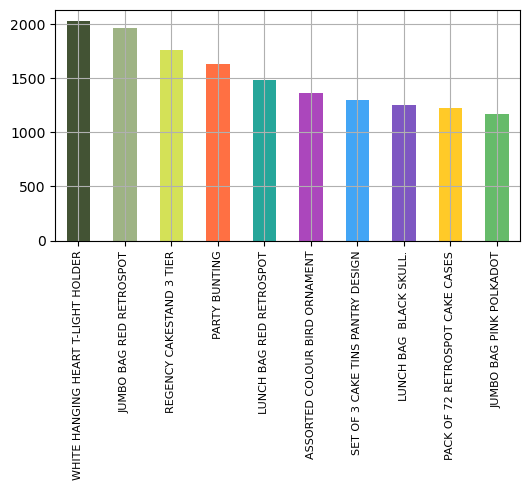

In [59]:
# Define custom colors (up to 10 colors)
custom_colors = [
    '#435334', '#9EB384', '#D4E157', '#FF7043', '#26A69A', 
    '#AB47BC', '#42A5F5', '#7E57C2', '#FFCA28', '#66BB6A'
]

# Plotting the bar chart with custom colors
df['Itemname'].value_counts().head(10).plot.bar(color=custom_colors, figsize=(6, 3))

plt.xticks(rotation=90, fontsize=8)
plt.grid()
plt.show()

<a id="section-three"></a>
## <b><span style='color:#f0bc22'> 3. |</span> Market Basket Analysis

Since the UK is the most purchased country, let insight into the item combination purchased in the UK.

### <b><span style='color:#f0bc22'> 3-1. |</span> Implementing Apriori

In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [24]:
df['Itemname']=df['Itemname'].str.strip()
df['BillNo']=df['BillNo'].astype('str')

In [25]:
basket=(df[df['Country']=='United Kingdom']
        .groupby(['BillNo','Itemname'])['Quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('BillNo'))

In [26]:
basket.head(3)

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
539993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
def encode_units(x):
    if x<=0: 
        return 0
    if x>=1:
        return 1

In [37]:
basket_sets=basket.applymap(encode_units)

In [38]:
frequent_itemsets=apriori(basket_sets,min_support=0.03,use_colnames=True)

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [39]:
rules=round(association_rules(frequent_itemsets,metric='lift',min_threshold=1),2)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.05,0.05,0.03,0.59,12.41,0.03,2.32,0.97
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.05,0.05,0.03,0.64,12.41,0.03,2.64,0.97
2,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.05,0.05,0.03,0.60,13.23,0.03,2.40,0.98
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.05,0.05,0.03,0.72,13.23,0.03,3.39,0.97
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.05,0.04,0.03,0.66,15.50,0.03,2.80,0.99


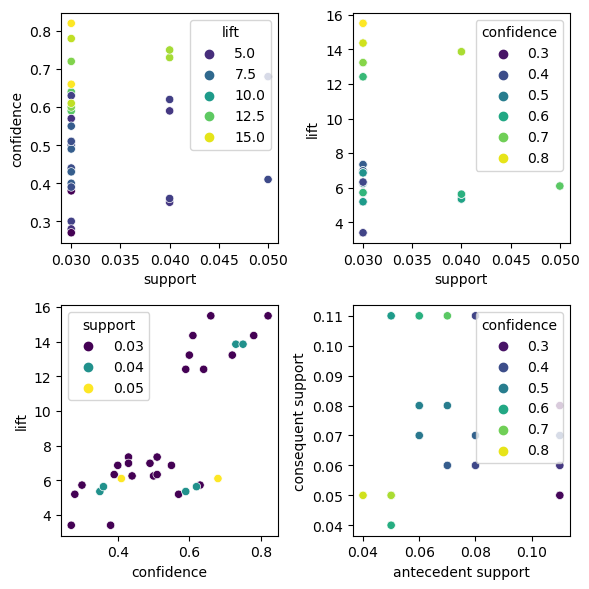

In [40]:
plt.figure(figsize=(6,6))
plt.subplot(221)
sns.scatterplot(x="support",y="confidence",data=rules,hue="lift",palette="viridis")
plt.subplot(222)
sns.scatterplot(x="support",y="lift",data=rules,hue="confidence",palette="viridis")
plt.subplot(223)
sns.scatterplot(x="confidence",y="lift",data=rules,hue='support',palette="viridis")
plt.subplot(224)
sns.scatterplot(x="antecedent support",y="consequent support",data=rules,hue='confidence',palette="viridis")
plt.tight_layout()
plt.show()

### <b><span style='color:#f0bc22'> 3-2. |</span> The top 5 of the highest **`support`** value of items(antecedents)

> #### *Support(item) = Transactions comprising the item / Total transactions*

In [41]:
rules[['antecedents','consequents','support']].sort_values('support',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,support
13,frozenset({'JUMBO BAG PINK POLKADOT'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.05
12,frozenset({'JUMBO BAG RED RETROSPOT'}),frozenset({'JUMBO BAG PINK POLKADOT'}),0.05
16,frozenset({'JUMBO BAG RED RETROSPOT'}),frozenset({'JUMBO STORAGE BAG SUKI'}),0.04
17,frozenset({'JUMBO STORAGE BAG SUKI'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.04
15,frozenset({'JUMBO SHOPPER VINTAGE RED PAISLEY'}),frozenset({'JUMBO BAG RED RETROSPOT'}),0.04


In the top support value of purchase, it means that "JUMBO BAG PINK RETROSPOT" is present in 5% of all purchases.

### <b><span style='color:#f0bc22'> 3-3. |</span> The top 5 of the highest **`confidence`** value of items

> #### *Confidence = Transactions comprising antecedent and consequent / Transactions comprising antecedent*

In [42]:
rules[['antecedents','consequents','confidence']].sort_values('confidence',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,confidence
5,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.82
31,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.78
7,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.75
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.73
3,frozenset({'GARDENERS KNEELING PAD CUP OF TEA'}),frozenset({'GARDENERS KNEELING PAD KEEP CALM'}),0.72


In the top confidence value of the purchase, it means that 82% of the customers who bought "PINK REGENCY TEACUP AND SAUCER" also bought "GREEN REGENCY TEACUP AND SAUCER".

### <b><span style='color:#f0bc22'> 3-4. |</span> The top 5 of the highest **`lift`** value of items

> #### *Lift = Confidence (antecedent -> consequent) / Support(antecedent)*

In [34]:
rules[['antecedents','consequents','lift']].sort_values('lift',ascending=False)[:5].style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,lift
4,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'PINK REGENCY TEACUP AND SAUCER'}),15.50
5,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),15.50
31,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),14.36
30,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'PINK REGENCY TEACUP AND SAUCER'}),14.36
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),13.86


In the top list value of the purchase, it means that customers are 15.5 times more likely to buy "GREEN REGENCY TEACUP AND SAUCER" if you sell "PINK REGENCY TEACUP AND SAUCER".

### <b><span style='color:#f0bc22'> 3-5. |</span> The best combination of the items

In [35]:
rules[(rules['lift']>=13)&(rules['confidence']>=0.7)].sort_values('lift',ascending=False).style.background_gradient(cmap=cm).set_precision(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.04,0.05,0.03,0.82,15.50,0.03,5.25,0.98
31,frozenset({'PINK REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.04,0.05,0.03,0.78,14.36,0.03,4.24,0.97
6,frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),0.05,0.05,0.04,0.73,13.86,0.04,3.55,0.98
7,frozenset({'GREEN REGENCY TEACUP AND SAUCER'}),frozenset({'ROSES REGENCY TEACUP AND SAUCER'}),0.05,0.05,0.04,0.75,13.86,0.04,3.78,0.98
3,frozenset({'GARDENERS KNEELING PAD CUP OF TEA'}),frozenset({'GARDENERS KNEELING PAD KEEP CALM'}),0.05,0.05,0.03,0.72,13.23,0.03,3.39,0.97


As you can see above, "REGENCY TEACUP AND SAUCER" have the best combination of the same items with different colors.

<a id="section-four"></a>
## <b><span style='color:#f0bc22'> 4. |</span> Conclusion

Here's what we learned from this analysis:
- The most purchased item is **`PAPER CRAFT, LITTLE BIRDIE`**.
- The most frequently purchased item is **`WHITE HANGING HEART T-LIGHT HOLDER`**.
- The best combination items are **`PINK REGENCY TEACUP AND SAUCER`** and **`GREEN REGENCY TEACUP AND SAUCER`**.

Hence, if you want to let customers purchase more, you can put an advertisement in `REGENCY TEACUP AND SAUCER` or put those items on the top of the page.

### <center> 📑Thanks for checking my notebook📒 </center>